# ***Sampling from a Biased Population***


* In this tutorial we will go over some code that recreates the visualizations in the Interactive Sampling Distribution Demo. 

* This demo looks at a hypothetical problem that illustrates what happens when we sample from a biased population and not the entire population we are interested in. 

* This tutorial assumes that you have seen that demo, for context, and understand the statistics behind the graphs. 

In [1]:
# Import the packages that we will be using for the tutorial

#(1) for sampling for the distributions
import numpy as np 

#(2) for basic plotting 
import matplotlib.pyplot as plt 

#(3) for plotting of the histograms
import seaborn as sns; sns.set() 


In [2]:
# Recreate the simulations from the video 

#(1) promedio de las personas de la universidad de michigan
mean_uofm = 155

#(2) la desviacion estandar de las personas de la universidad de michigan
sd_uofm = 5

#(3) Promedio de las personas que van al gimnacion en la universidad de michigan
mean_gym = 185 

#(4) desviacion estandar de las personas que van al gimnacio en la universidad de michigan
sd_gym = 5 

#(5) porcentage de estudiantes en el gimnasio
gymperc = 0.3

#(6) poblacion total
totalPopSize = 40000 

In [3]:
# n = es el numero de estudiantes en que no estan en el gym
n = int(totalPopSize * (1 - gymperc))

# m es el numero de estudiantes que estan en el gym
m = int(totalPopSize * (gymperc))

In [4]:
print("n =",n)
print("m =",m)

n = 28000
m = 12000


In [5]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the ``normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution

In [6]:
# Create the two subgroups
uofm_students = np.random.normal(mean_uofm, sd_uofm, size=m)

students_at_gym = np.random.normal(mean_gym, sd_gym, size=n)

In [7]:
uofm_students 

array([148.08750457, 155.33800272, 157.5647744 , ..., 151.86802381,
       158.35858427, 157.29281389])

In [8]:
students_at_gym

array([187.69551099, 190.37391439, 189.37981244, ..., 188.05133752,
       189.85219375, 172.78553681])

In [9]:
help(np.append)

Help on function append in module numpy:

append(arr, values, axis=None)
    Append values to the end of an array.
    
    Parameters
    ----------
    arr : array_like
        Values are appended to a copy of this array.
    values : array_like
        These values are appended to a copy of `arr`.  It must be of the
        correct shape (the same shape as `arr`, excluding `axis`).  If
        `axis` is not specified, `values` can be any shape and will be
        flattened before use.
    axis : int, optional
        The axis along which `values` are appended.  If `axis` is not
        given, both `arr` and `values` are flattened before use.
    
    Returns
    -------
    append : ndarray
        A copy of `arr` with `values` appended to `axis`.  Note that
        `append` does not occur in-place: a new array is allocated and
        filled.  If `axis` is None, `out` is a flattened array.
    
    See Also
    --------
    insert : Insert elements into an array.
    delete : Delet

In [10]:
# Create the population from the subgroups
population = np.append(uofm_students, students_at_gym)
population

array([148.08750457, 155.33800272, 157.5647744 , ..., 188.05133752,
       189.85219375, 172.78553681])

In [11]:
# help(plt.subplot)

$ \ $

# ***plt.subplot(*pos*)***

`*pos*` is a three digit integer, where the first digit is the number of rows, the second the number of columns, and the third the index of the subplot.





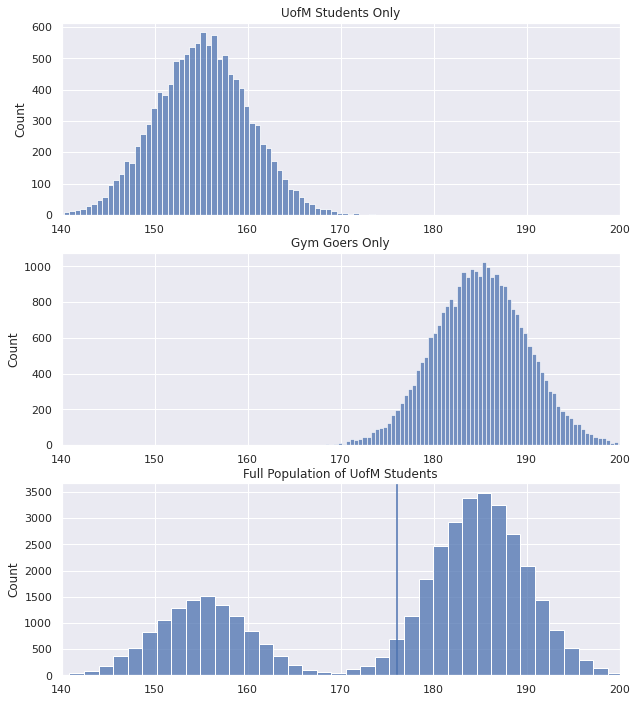

In [12]:
# Set up the figure for plotting
plt.figure(figsize=(10,12))

#(1) Plot the UofM students only
plt.subplot(3,1,1)
sns.histplot(uofm_students)
plt.title("UofM Students Only")
plt.xlim([140,200])


#(2) Plot the Gym Goers only
plt.subplot(3,1,2)
sns.histplot(students_at_gym)
plt.title("Gym Goers Only")
plt.xlim([140,200])


#(3) Plot both groups together
plt.subplot(3,1,3)
sns.histplot(population)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population))
plt.xlim([140,200])

plt.show()

$ \ $ 

------

# ***What Happens if We Sample from the Entire Population?***


We will sample randomly from all students at the University of Michigan.

In [13]:
# Parametros de simulacion

#(1) numero de muestras (samples)
numberSamps = 5000

#(2) tamaño de la muestra
sampSize = 50

In [14]:
# help(np.empty)

In [15]:
# Get the sampling distribution of the mean from only the gym
lista=list()
for i in range(numberSamps):
    random_students = np.random.choice(population, sampSize)
    lista.append(np.mean(random_students))



mean_distribution=np.array(lista)
mean_distribution  

array([177.5040814 , 171.53727051, 174.41402173, ..., 172.58152767,
       173.14613379, 174.31886236])

In [16]:
print(min(mean_distribution),max(mean_distribution))

167.7736059772487 183.1664956297636


$ \ $

# ***A continuación vamos a mostrar una representación de `mean_distribution`***

In [17]:
mean_distribution 

array([177.5040814 , 171.53727051, 174.41402173, ..., 172.58152767,
       173.14613379, 174.31886236])

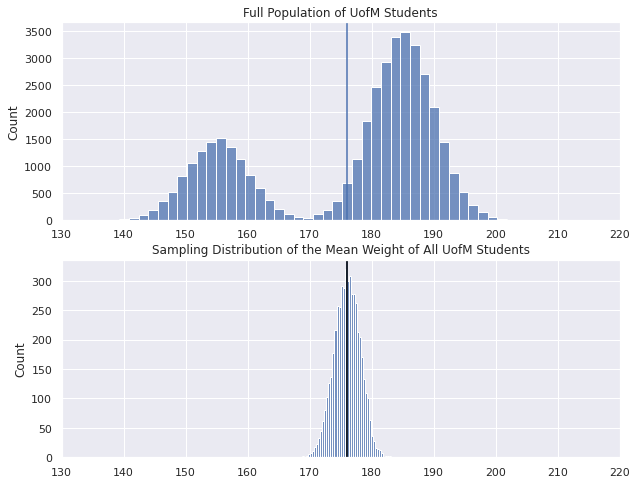

In [18]:
#(1) Plot the population and the biased sampling distribution
plt.figure(figsize = (10,8))


#(2) Plotting the population again
## plt.subplot(m,n,p) significa m renglones, n columnas y p es el indice del subplot
plt.subplot(2,1,1)
sns.histplot(population)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population))
plt.xlim([130,220])


#(3) Plotting the sampling distribution
plt.subplot(2,1,2)
sns.histplot(mean_distribution)
plt.title("Sampling Distribution of the Mean Weight of All UofM Students")
plt.axvline(x = np.mean(population))
plt.axvline(x = np.mean(mean_distribution), color = "black")
plt.xlim([130,220])

plt.show()

$ \ $

----

# ***What Happens if We take a Non-Representative Sample?***

What happens if I only go to the gym to get the weight of individuals, and I don't sample randomly from all students at the University of Michigan?

In [20]:
# Parametros de simulacion

#(1) numero de muestras (samples)
numberSamps_2 = 5000

#(2) tamaño de la muestra
sampSize_2 = 3


In [26]:
mean_distribution_2 = list()
for i in range(numberSamps):
    random_students = np.random.choice(students_at_gym, sampSize)
    mean_distribution_2.append(np.mean(random_students))


mean_distribution_2=np.array(mean_distribution_2)
mean_distribution_2

array([185.00559616, 188.02041713, 188.43118032, ..., 185.35618114,
       186.11576821, 184.25997907])

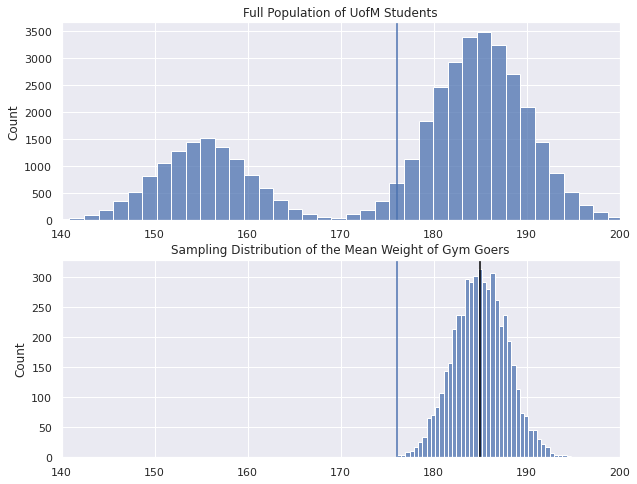

In [27]:
#(1) Plot the population and the biased sampling distribution
plt.figure(figsize = (10,8))


#(2) Plotting the population again
plt.subplot(2,1,1)
sns.histplot(population)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population))
plt.xlim([140,200])


#(3) Plotting the sampling distribution
plt.subplot(2,1,2)
sns.histplot(mean_distribution)
plt.title("Sampling Distribution of the Mean Weight of Gym Goers")
plt.axvline(x = np.mean(population))
plt.axvline(x = np.mean(students_at_gym), color = "black")
plt.xlim([140,200])

plt.show()